# _Sampling_

This notebook was adapted from Dataquest's first lesson on statistics, _Sampling_. In this lesson/notebook, we'll dive deeper into the various sampling methods in statistics. 

## _Introduction_

**Notes**
- going to go deeper into statistical theory
- learn new and more powerful statistical techniques & metrics, like:
    - standard deviation
    - z-scores
    - confidence intervals
    - probability estimation
    - hypothesis testing (including A/B testing)
- in this first part, focus we'll be around getting data for analysis
- we'll begin to understand the sort of problems that statistics can solve

## _Solving Problems with Statistics_

**Notes**
- Scenario: managing a small tech company with 7 original employees
    - years have gone by, now there are 231 employees
    - as company scales, analyzing employee data becomes next to impossible
- this is where statistics comes into play
    - we can organize, summarize, and visualize large amounts of data
    - find hidden patterns
- imagine that company is now 5000+ strong
    - ask data analyst to conduct a survey on work satisfaction
        - aren't going to survey all employees, only portion
    - analyst reports a _significant_ decrease in work satisfaction
        - means it's very unlikely to have by chance
- through statistics we can learn to use a smaller set of data to answer questions about larger sets of data

In [1]:
import os

# get current working directory
os.getcwd()

'/Users/jai/Documents/joes-dataquest/courses/probability-statistics'

In [2]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/Users/jai/Documents/joes-dataquest/courses/probability-statistics')

## _Populations and Sample_

**Notes**
- previous question was about _all_ people in company, which is the population
    - only selected a small group to answer though, which is called a sample
    - selecting a smaller group from a population = sampling
- populations do not necessarily consist of people
    - can be populations of monkeys, countries, soils, etc.
- now it's our turn to play data analyst
    - we collected data about the salary of all the individuals in the company working in IT roles
    - based on this data, we want to answer a series of questions
    - depending on question, our data is either a sample or a population

**Questions**
1. What's the average salary of individuals in our company working in IT roles? 
    - Data = population

2. What's the proportion of individuals in the IT department having salaries under $60000?
    - Data = population

3. What's the minimum salary in the entire company?
    - Data = sample

4. What's the minimum salary in the IT department of our company?
    - Data = population

5. What's the proportion of salaries under $20000 in the entire company?
    - Data = sample

## _Sampling Error_

**Notes**
- we should try to use the population
    - often in practice, not possible
    - getting data is not easy either
- sample, by definition, is incomplete set of data for question we're trying to answer
    - can be seen as error, which is called _sampling error_
- _parameter_: metric specific to a population
    - ex: average salary of all employees
- _statistic_: metric specific to a sample
- difference between the two
    - _sampling error_ = parameter - statistic
- The data set we'll be working with going forward on players in the WNBA
    - contains general information about players
    - along with metrics for the 16-17 season

In [33]:
# import data set
import pandas as pd
pd.set_option('display.max_columns', None)

wnba = pd.read_csv(path/'data/wnba.csv')

In [5]:
# check out first few rows
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [6]:
# check out last few rows
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [7]:
# find the number of rows and columns
wnba.shape

(143, 32)

## _Checking the Documentation_

**Notes**

- G = Games Played
- MIN = Minutes Played
- FGM = Field Goals Made
- FGA = Field Goals Attempts
- FG% = Field Goals %
- 3PM = 3Points Made
- 3PA = 3Points Attempts
- 3P% = 3Points %
- FTM = Free Throws made
- FTA = Free Throws Attempts
- FT% = Free Throws %
- OREB = Offensive Rebounds
- DREB = Defensive Rebounds
- REB = Total Rebounds
- AST = Assists
- STL = Steals
- BLK = Blocks
- TO = Turnovers
- PTS = Total points
- DD2 = Double doubles
- TD3 = Triple doubles

In [8]:
# find the max number of games played by a player in 16-17
parameter = max(wnba['Games Played']); parameter

32

In [25]:
# randomly sample 30 players from population
sample = wnba.sample(n=30, random_state=1); sample.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
78,Keisha Hampton,CHI,F,185,78.0,22.790358,US,"February 22, 1990",27,DePaul,...,36,59,95,24,20,7,21,207,0,0
116,Saniya Chong,DAL,G,173,64.0,21.383942,US,"June 27, 1994",23,Connecticut,...,9,19,28,33,21,3,23,87,0,0
31,Carolyn Swords,SEA,C,198,95.0,24.232221,US,"July 19, 1989",28,Boston College,...,10,29,39,9,5,4,22,54,0,0
5,Alexis Peterson,SEA,G,170,63.0,21.799308,US,"June 20, 1995",22,Syracuse,...,3,13,16,11,5,0,11,26,0,0
125,Stefanie Dolson,CHI,C,196,97.0,25.249896,US,"August 1, 1992",25,Connecticut,...,35,121,156,65,14,37,65,398,3,0


In [13]:
# find max number of games using the sample
statistic = max(sample['Games Played']); statistic

30

In [14]:
# measure the sampling error
sampling_error = parameter - statistic; sampling_error

2

## _Simple Random Sampling_

- when we sample, we want to minimize the sampling error as much as possible
    - ex: measuring mean height of US population
        - want our sample mean height to be as close as possible to population's parameter (i.e. mean height)
        - sample so that it is similar in structure with group forming population
- in other words, we want our samples to be representative
    - if sample is representative, sampling error is low
    - less representative, greater the sampling error
- simple random sampling (SRS): generate random numbers and use them to select sample units from population
    - `Series.sample()` methods performs SRS
    - when we use `random_state`, make generation of random numbers predictable
        - specifies initial value used by psuedorandom number generator
- In the cells below, we're going to visualize the discrepency between a parameter and its corresponding statistic in SRS

In [17]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np

mean_list = []
for n in range(100):
    # take sample of 10 values from PTS column, with random_state = n
    sample = wnba['PTS'].sample(n=10, random_state=n)
    # get mean from sample
    mean = np.mean(sample)
    # append mean to list
    mean_list.append(mean)

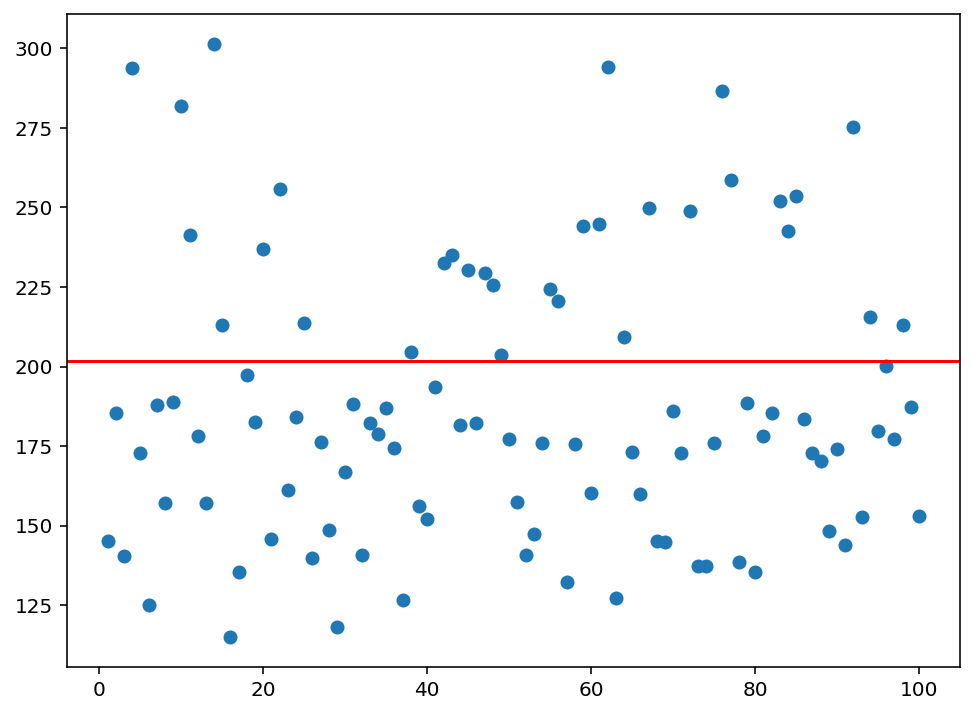

In [21]:
# plot discrepency between the parameter an statistics
plt.figure(figsize=(8,6))
plt.scatter(x=np.arange(1,101), y = mean_list)
plt.axhline(np.mean(wnba['PTS']), color='red');

## _Stratified Sampling_

**Notes**
- entirely random nature of SRS could potentially leave out certain individuals of interest
    - in our example, different positions in basketball
        - metrics of players depend on position
        - not guaranteed that we'll have a representative sample that has observations for every position we want to analyze

In [22]:
# there are five unique positions in data set
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


- **F** = Forward
- **G** = Guard
- **C** = Center
- **G/F** = Guard/Forward
- **F/C** = Forward/Center

Let's take a quick look at our `sample` and see the breakdown by position.

In [31]:
# group players by position then return counts by position
(sample.groupby('Pos')['Pos'].count()).sort_values(ascending=False)

Pos
G      11
C       8
F       6
G/F     3
F/C     2
Name: Pos, dtype: int64

As we can see above there is an uneven distribution amongest the five positions. To address this we can change the sampling method to one where we organize our data into different groups then do SRS from each group.

In our specific example that would mean grouping players by position than sampling from that group. 

## _Stratified Sampling (cont.)_

**Notes/Instructions**
1. Create new column describing number of points player scored per game during the season.
2.

In [34]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [44]:
list(wnba['Pos'].unique())

['F', 'G/F', 'G', 'C', 'F/C']

In [66]:
# create a new column PPG, that combines PTS and Games Played columns
wnba['PPG'] = wnba['PTS'] / wnba['Games Played']

In [67]:
# stratify position F
forward = wnba[wnba['Pos'] == 'F']
# stratify position G/F
guard_forward = wnba[wnba['Pos'] == 'G/F']
# stratify position G
guard = wnba[wnba['Pos'] == 'G']
# stratify position F
center = wnba[wnba['Pos'] == 'C']
# stratify position F
forward_center = wnba[wnba['Pos'] == 'F/C']

# loop through the strata and sample 10 observations from each
mean_points = {}

for strata, position in [(forward, 'F'), (guard_forward, 'G/F'), 
                         (guard, 'G'), (center, 'C'), (forward_center, 'F/C')]:
    # sample 10 observations using simple random sampling
    sample = strata.sample(n=10, random_state=0)
    # get mean PPG
    mean_ppg = np.mean(sample['PPG'])
    # store mean in mean_points dictionary with associated dataframe
    mean_points[position] = mean_ppg

In [68]:
# sort dictionary according to values
sorted_points = sorted((value, key) for (key, value) in mean_points.items()); sorted_points

[(6.817264935760487, 'G/F'),
 (7.092926195632343, 'G'),
 (8.702175158545568, 'F'),
 (9.059118773946361, 'F/C'),
 (9.833761394334251, 'C')]

In [69]:
# return position of the max value in mean_points dictionary
max(mean_points, key=mean_points.get)

'C'

In [70]:
# store value
position_most_points = max(mean_points, key=mean_points.get)

## _Proportional Stratified Sampling_

This is a good start however we have overlooked one variable that is a signficant influence in regards to point scored: number of games played in. 

In [73]:
print('Min:', wnba['Games Played'].min(), '\nMax:', wnba['Games Played'].max())

Min: 2 
Max: 32


Now let's dive deeper into this and gain a better understanding of the distribution of the games played.

In [76]:
wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

As we can see above, `72.72%` of players had more than 23 games played. This particular group of players is probably exerting some influence on the means of the points scored that we previously got. 

Additionally, we have to think of this number when it comes to sampling. We could either get a sample that has a lower, higher, or similar rate of players from this group, which will have an effect on the variance of the mean (see scatter plot above). 

Knowing this, we can stratify our data set by number of games played and then randomly sample from each a _proportional_ number of observations. 

In [80]:
# stratify according to games played
low_games = wnba[wnba['Games Played'] <= 12]
mid_games = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
high_games = wnba[wnba['Games Played'] > 22]

In [82]:
games_played_mean = []

# perform stratified proportional sampling 100 times
for n in range(100):
    # gather samples from each data set
    s1 = low_games.sample(n = 1, random_state = n)
    s2 = mid_games.sample(n = 2, random_state = n)
    s3 = high_games.sample(n = 7, random_state = n)
    # concatenate all together
    data = pd.concat([s1, s2, s3])
    # compute the mean
    mean = np.mean(data['PTS'])
    # append mean to list
    games_played_mean.append(mean)

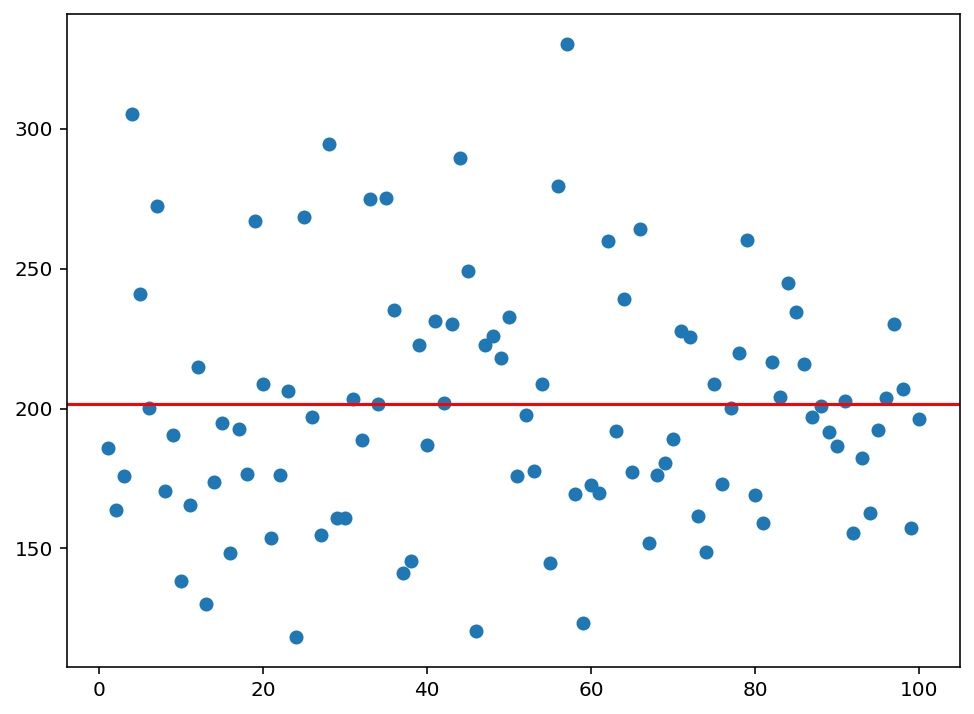

In [84]:
# plot discrepency between the parameter an statistics
plt.figure(figsize=(8,6))
plt.scatter(x=np.arange(1,101), y = games_played_mean)
plt.axhline(np.mean(wnba['PTS']), color='red');

## _Choosing the Right Strate_

Our results don't look any better than the previous one that utilized SRS. Why is this? Well, when it comes to games played, a player is considered to have played one game even if it was only for 1-2 minutes! Based off of this fact, we can see that `Games Played` may not be the best metric to stratify by. Instead we can stratify according to minutes played, which gives a better picture of exactly how much a player played. 

**Guidelines for choosing good strata:**
1. _Minimize the variability within each stratum_
    - if the variability is high, it might be a sign that you either need a more granular stratification or change the criterion of stratification
2. _Maximize the variability between strata_
    - good strata are different from one another
3. _Stratification criterion should be strongly correlated with the property you're trying to measure_
    - In our example, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure)

In [87]:
# get breakdown of Minutes Played
wnba['MIN'].value_counts(bins = 3, normalize = True) * 100

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64

In [88]:
# stratify according to minutes
min_low = wnba[wnba['MIN'] <= 347.333]
min_mid = wnba[(wnba['MIN'] > 347.333) & (wnba['MIN'] <= 682.667)]
min_high = wnba[wnba['MIN'] > 682.667]

In [89]:
minutes_played_mean = []

# perform stratified sampling according to minutes played
for n in range(100):
    # gather samples from each data set
    s1 = min_low.sample(n = 3, random_state = n)
    s2 = min_mid.sample(n = 4, random_state = n)
    s3 = min_high.sample(n = 3, random_state = n)
    # concatenate all together
    data = pd.concat([s1, s2, s3])
    # compute the mean
    mean = np.mean(data['PTS'])
    # append mean to list
    minutes_played_mean.append(mean)

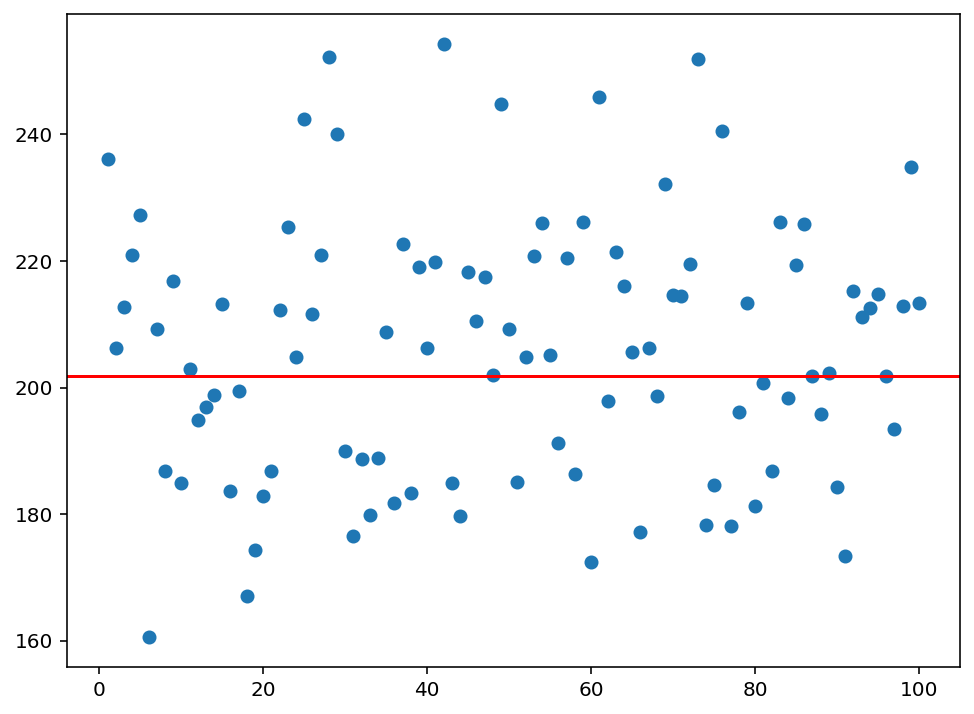

In [91]:
# plot discrepency between the parameter an statistics
plt.figure(figsize=(8,6))
plt.scatter(x=np.arange(1,101), y = minutes_played_mean)
plt.axhline(np.mean(wnba['PTS']), color='red');

## _Cluster Sampling_

**Notes**
- Common in data science that data is scattered in such a way that it comes from disparate sources
    - what you could do in this case is list all the data sources and then randomly pick a few of them to collect data from
- Theoretical situation: had to collect data from each team's website
    - each team's website is considered a cluster

In [92]:
# lets see each team
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

For cluster sampling in our theoretical situation, we'd find a way to randomly pick a few clusters from our listing, and we need to be sure that we avoid picking a cluster twice.

In [100]:
# on way to sample four clusers randomly
teams = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0); teams

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

In [103]:
list(teams)[0]

'PHO'

With this knowledge, we have a lot of options at our disposal. We can either collect all the data from each cluster, or just sample; additionally we can use different sampling methods for different clusters. As an example, we could use stratified sampling on the first two clusters and SRS on the other two. 

In [109]:
# from the four teams above, create data sets for each (i.e. the clusters)
t1 = wnba[wnba['Team'] == list(teams)[0]]
t2 = wnba[wnba['Team'] == list(teams)[1]]
t3 = wnba[wnba['Team'] == list(teams)[2]]
t4 = wnba[wnba['Team'] == list(teams)[3]]

# combine all together
data = pd.concat([t1, t2, t3, t4]); data.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,PPG
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0,1.500000
15,Angel Robinson,PHO,F/C,198,88.0,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0,3.866667
25,Brittney Griner,PHO,C,206,93.0,21.915355,US,"October 18, 1990",26,Baylor,5,22,682,167,293,57.0,0,0,0.0,127,154,82.5,43,129,172,39,13,54,52,461,6,0,20.954545
27,Camille Little,PHO,F,188,82.0,23.200543,US,"January 18, 1985",32,North Carolina,11,30,759,93,219,42.5,9,52,17.3,33,52,63.5,42,71,113,42,28,13,50,228,0,0,7.600000
32,Cayla George,PHO,C,193,87.0,23.356332,AU,"April 20, 1987",30,Georgia,1,28,365,40,105,38.1,13,45,28.9,7,12,58.3,10,71,81,15,9,11,13,100,1,0,3.571429


We're now going to use the data collected to estimate the mean for the following player attributes:
- Height
- Age
- BMI
- Total points

In [112]:
# sampling error for height
sampling_error_height = np.mean(wnba['Height']) - np.mean(data['Height'])
# sampling error for age
sampling_error_age = np.mean(wnba['Age']) - np.mean(data['Age'])
# sampling error for BMI
sampling_error_BMI = np.mean(wnba['BMI']) - np.mean(data['BMI'])
# sampling error for total points
sampling_error_points = np.mean(wnba['PTS']) - np.mean(data['PTS'])

print('Sampling error for height:' , sampling_error_height, 
      '\nSampling error for age:', sampling_error_age, 
      '\nSampling error for BMI:', sampling_error_BMI, 
      '\nSampling error for total points:', sampling_error_points)

Sampling error for height: -0.06400121617511445 
Sampling error for age: -1.401337792642142 
Sampling error for BMI: 0.23095444165950596 
Sampling error for total points: -27.79674673152934


## _Sampling in Data Science Practice_

**Notes**
- Say you work for e-commerce company that has table in database with 10+ million rows of online transactions
    - job is to find categories of customers with low buying rate
    - sampling allows us to work on and gain valuable insights on significantly less than 10+ million rows (which will save you a lot of code!)
- Another situation, collecting data from an API that either has usage limit or is not free
    - forced to sample, knowing how and what to sample can be of great use
- Also, when data is scattered across different locations, sampling can be a valuable tool
    - clustering sampling would be great choice in this scenario
  
## Descriptive and Inferential Statistics
- when describing a sample/population (by measuring averages, proportions, and other metrics) we do **descriptive statistics**
- when trying to use a sample to draw conclusions about a population --> inferential statistics
    - we're _inferring_ information from the sample about the population